In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with gzip.open('../data/wiki-RfA.txt.gz', 'rt', encoding='utf-8') as f:
    blocks = f.read().strip().split('\n\n')  # Assuming each record is separated by a blank line

data = []

# Parse each block of text into a dictionary
for block in blocks:
    record = {}
    for line in block.split('\n'):
        if line:
            key, value = line.split(':', 1)  # Split on the first colon only
            record[key.strip()] = value.strip()
    data.append(record)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

#Rename the columns
df.columns = ['source', 'target', 'vote', 'result', 'year', 'date', 'comment']

#Convert the year, the vote and the result to numeric values
df['year'] = df['year'].astype(int)
df['vote'] = df['vote'].astype(int)
df['result'] = df['result'].astype(int)


In [54]:
#Transform the date to datetime if it is not equal to a ''
date_format = "%H:%M, %d %B %Y"
df_test = df.copy()
df_test['date'] = pd.to_datetime(df['date'], format=date_format, errors='coerce')
df_test

,source,target,vote,result,year,date,comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,NaT,Support
198271,Angela,WhisperToMe,1,1,2003,NaT,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,NaT,Support. Age has nothing to do with maturity....


In [41]:
# Define a function to extract date components
def extract_date_components(date_str):
    try:
        # Split the date string by the comma and space to separate time and date parts
        time_part, date_part = date_str.split(', ')
        # Split the time part by the colon to separate hours and minutes
        hour, minute = time_part.split(':')
        # Split the date part by space to separate day, month, and year
        day, month, year = date_part.split(' ')
        
        return pd.Series({
            "hour": hour,
            "minute": minute,
            "day": day,
            "month": month,
            "year2": year
        })
    except ValueError:
        # If there is a ValueError, return None for each component
        return pd.Series({
            "hour": None,
            "minute": None,
            "day": None,
            "month": None,
            "year2": None
        })

# Apply the function to each row in the 'date' column
date_components = df['date'].apply(extract_date_components)

# Concatenate the new DataFrame with the original one (if needed)
new_df = pd.concat([df, date_components], axis=1)

new_df

,source,target,vote,result,year,date,comment,hour,minute,day,month,year2
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,23,13,19,April,2013
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,01,04,20,April,2013
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,23,43,19,April,2013
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...,00,11,20,April,2013
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit...",00,56,20,April,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,02,51,2,Sep,2003
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,23,45,26,Nov,2003
198272,Jiang,WhisperToMe,1,1,2003,,Support. --,None,None,None,None,None
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....,05,38,5,Dec,2003


In [42]:
#Look at the distribution of the votes
df['vote'].value_counts()

#Look at the distribution of the results
df['result'].value_counts()

#Look at the distribution of the years
df['year'].value_counts()


year
2006    45325
2007    41541
2008    30479
2009    21375
2005    20239
2010    13970
2011     8556
2004     6541
2012     6474
2013     3572
2003      203
Name: count, dtype: int64

In [43]:
new_df

,source,target,vote,result,year,date,comment,hour,minute,day,month,year2
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,23,13,19,April,2013
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,01,04,20,April,2013
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,23,43,19,April,2013
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...,00,11,20,April,2013
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit...",00,56,20,April,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,02,51,2,Sep,2003
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,23,45,26,Nov,2003
198272,Jiang,WhisperToMe,1,1,2003,,Support. --,None,None,None,None,None
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....,05,38,5,Dec,2003


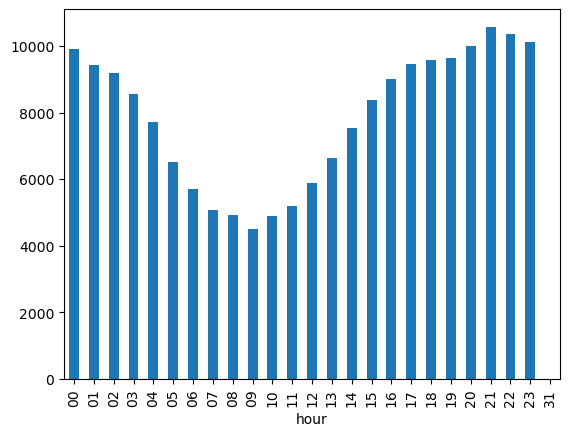

In [44]:
#Look at the distibution for the values of the hour with histogram and order the values
new_df['hour'].value_counts().sort_index().plot(kind='bar')
plt.show()

We have a vote date with an hour equal to 31 we will remove the date associated with the vote

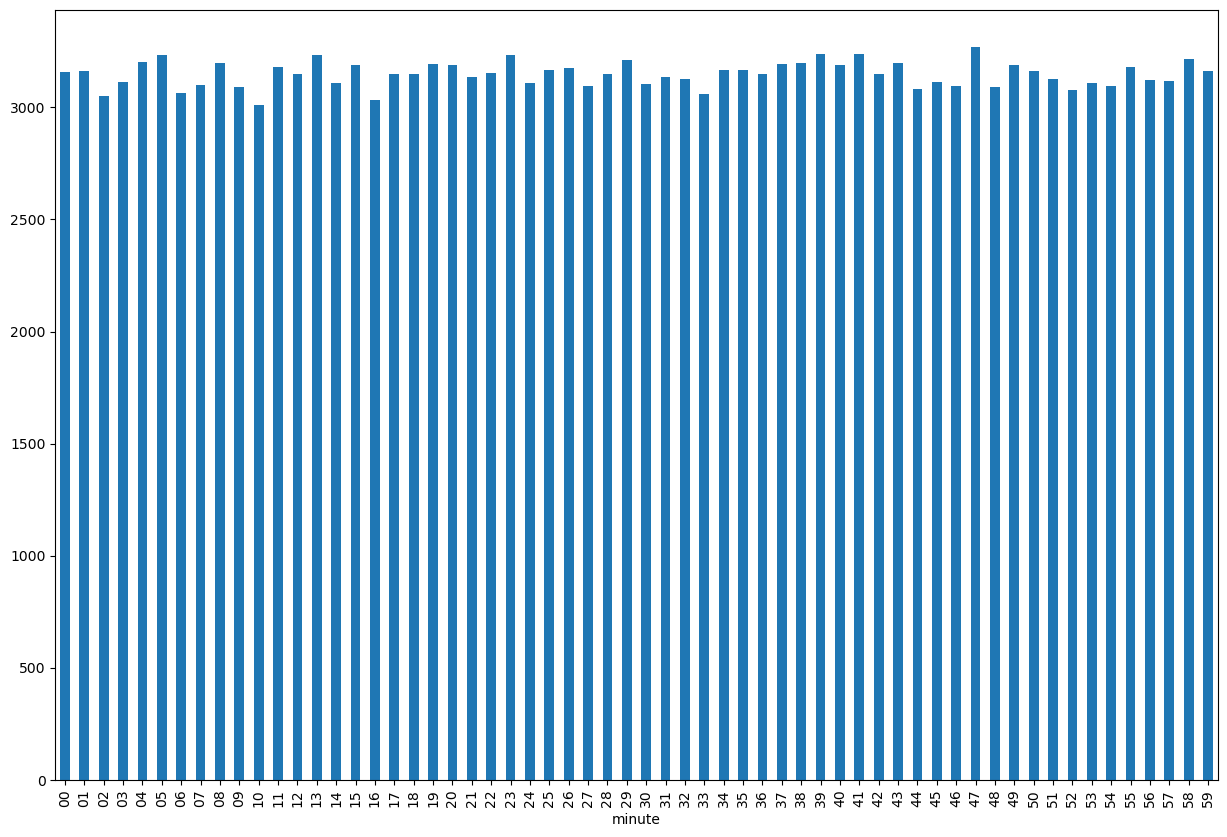

In [45]:
#Set the date to empty for the row where the hour is 31
new_df.loc[new_df['hour'] == '31', 'date'] = ''
new_df[new_df['hour'] == '31']

#Plot the distribution of the values for the minutes wuth histogram and order the values and augment the largeur of the figure
new_df['minute'].value_counts().sort_index().plot(kind='bar' , figsize=(15,10))
plt.show()


All the values for the minutes look to be fine

<Axes: xlabel='day'>

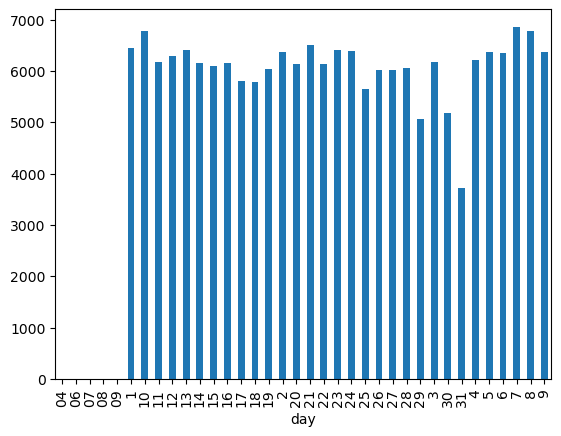

In [46]:
#Look at the distribution of the values for the days with histogram and order the values
new_df['day'].value_counts().sort_index().plot(kind='bar')

All values for the day look also to be ok 

<Axes: xlabel='month'>

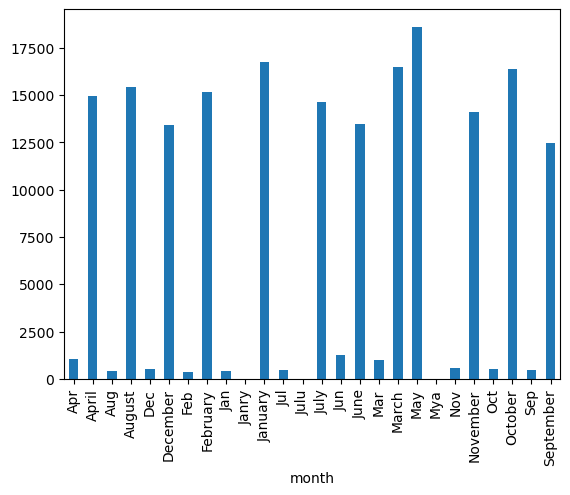

In [47]:
#Look at the distribution of the values for the months with histogram and order the values
new_df['month'].value_counts().sort_index().plot(kind='bar')


We can see that for specific months different values appear in the dataset. For example, for July we have Jul, Julu, July ; for the October we have Oct, October. 

In [48]:
#Map the values of the months to the full name of the month
month_map = { 
    "Apr" : "April",
    "April" : "April",
    "Aug" : "August",
    "August" : "August",
    "Dec" : "December",
    "December" : "December",
    "Feb" : "February",
    "February" : "February",
    "Jan" : "January",
    "Janry" : "January",
    "January" : "January",
    "Jul" : "July",
    "Julu" : "July",
    "July" : "July",
    "Jun" : "June",
    "June" : "June",
    "Mar" : "March",
    "March" : "March",
    "May" : "May",
    "Mya" : "May",
    "Nov" : "November",
    "November" : "November",
    "Oct" : "October",
    "October" : "October",
    "Sep" : "September",
    "September" : "September"
}

def correction_month (month) : 
    return month_map.get(month, month)

new_df['month'] = new_df['month'].apply(correction_month)
new_df


,source,target,vote,result,year,date,comment,hour,minute,day,month,year2
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,23,13,19,April,2013
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,01,04,20,April,2013
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,23,43,19,April,2013
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...,00,11,20,April,2013
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit...",00,56,20,April,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,02,51,2,September,2003
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,23,45,26,November,2003
198272,Jiang,WhisperToMe,1,1,2003,,Support. --,None,None,None,None,None
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....,05,38,5,December,2003


<Axes: xlabel='year2'>

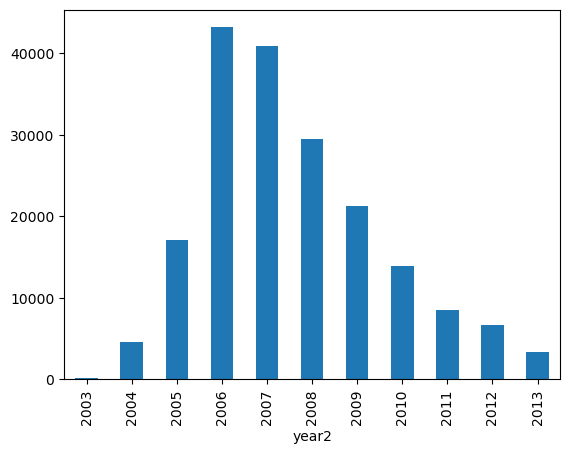

In [49]:
#Look at the distribution of the values for the years with histogram and order the values
new_df['year2'].value_counts().sort_index().plot(kind='bar')

The values for the years seems also to be ok. 

In [62]:
new_df['date2'] = pd.to_datetime(new_df['day'].astype(str) + ' ' +
                            new_df['month'] + ' ' +
                            new_df['year'].astype(str) + ' ' +
                            new_df['hour'].astype(str) + ':' +
                            new_df['minute'].astype(str),
                            format='%d %B %Y %H:%M' , errors = 'coerce')

new_df.drop(['hour', 'minute', 'day', 'month', 'year2', 'date'], axis=1, inplace=True)
new_df

,source,target,vote,result,year,comment,date2
0,Steel1943,BDD,1,1,2013,'''Support''' as co-nom.,2013-04-19 23:13:00
1,Cuchullain,BDD,1,1,2013,'''Support''' as nominator.--,2013-04-20 01:04:00
2,INeverCry,BDD,1,1,2013,'''Support''' per noms.,2013-04-19 23:43:00
3,Cncmaster,BDD,1,1,2013,'''Support''' per noms. BDD is a strong contri...,2013-04-20 00:11:00
4,Miniapolis,BDD,1,1,2013,"'''Support''', with great pleasure. I work wit...",2013-04-20 00:56:00
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,Support,2003-09-02 02:51:00
198271,Angela,WhisperToMe,1,1,2003,Support.,2003-11-26 23:45:00
198272,Jiang,WhisperToMe,1,1,2003,Support. --,NaT
198273,Pakaran,WhisperToMe,1,1,2003,Support. Age has nothing to do with maturity....,2003-12-05 05:38:00


<Axes: ylabel='Frequency'>

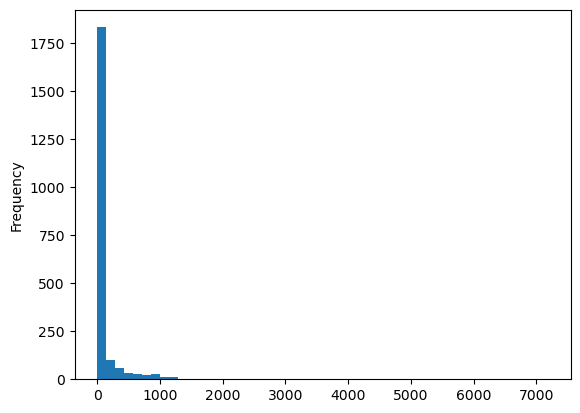

In [61]:
#Look at the distibution of the length of the comments with histogram and order the values
new_df['comment'].str.len().value_counts().sort_index().plot(kind='hist', bins=50)


In [65]:
new_df[(new_df.comment == 'Support') | (new_df.comment == 'Support.')]

,source,target,vote,result,year,comment,date2
12827,Mtking,January,1,1,2011,Support.,2011-05-29 12:05:00
18803,Suomi Finland 2009,Airplaneman,1,1,2010,Support,2010-08-22 23:18:00
24102,Tommy2010,Mkativerata,1,1,2010,Support.,2010-08-04 12:04:00
24103,wiooiw,Mkativerata,1,1,2010,Support.,2010-08-04 14:24:00
25908,Hell in a Bucket,TFOWR,1,1,2010,Support,2010-06-08 04:19:00
...,...,...,...,...,...,...,...
198258,Angela,Timwi,1,1,2003,Support.,2003-12-18 04:29:00
198260,Ark30inf,Tristanb,1,1,2003,Support.,2003-10-09 04:54:00
198262,Alexandros,Tristanb,1,1,2003,Support.,2003-10-25 16:03:00
198270,172,Vancouverguy,1,1,2003,Support,2003-09-02 02:51:00
